In [65]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

1. Binary classification

Primero simularemos la salida de un modelo.

Luego pasaremos dicha salida por una sigmoide para obtener probabilidades.

Usaremos un threshold para asignar a una clase (positiva o negativa).

Calcularemos las métrics usando los valores predichos y los verdaderos.



-> lo haremos a mano para entender cómo se hace y luego usando librerís y frameworks.

In [70]:
# Example data
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1])  # True labels
model_output = np.array([-2.5, 1.5, 2.3, -0.8, 0.9, 0.7, 0.75, 0.2, -0.1]) 

In [71]:
# Apply sigmoid to model output to get probabilities
probabilities = 1 / (1 + np.exp(-model_output))

In [72]:
probabilities

array([0.07585818, 0.81757448, 0.90887704, 0.31002552, 0.7109495 ,
       0.66818777, 0.6791787 , 0.549834  , 0.47502081])

In [73]:
# Set a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (probabilities >= threshold).astype(int)

y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0])

### By hand

In [74]:
def calculate_confusion_matrix(y_true, y_pred):
    # Initialize counts for TP, TN, FP, FN
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    return tp, tn, fp, fn

In [75]:
tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
tp, tn, fp, fn

(4, 2, 2, 1)

In [76]:
precision = tp / (tp + fp)
precision

0.6666666666666666

In [77]:
recall = tp / (tp + fn)
recall

0.8

In [93]:
# now i will calculate precision and recall for different thresholds

thresholds = [0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.85, 0.9]
preds = []
recalls = []

thresholds = [0.07, 0.31, 0.47, 0.54,   
              0.66, 0.67, 0.7,  0.8, 0.9]


for t in thresholds:
    # y_pred depends on the threshold
    y_pred = (probabilities >= t).astype(int)
    #
    tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
    # 
    preds.append(tp/(tp + fp))
    recalls.append(tp/(tp+fn))
    #
    




In [94]:
preds, recalls

([0.5555555555555556,
  0.625,
  0.7142857142857143,
  0.6666666666666666,
  0.6,
  0.75,
  1.0,
  1.0,
  1.0],
 [1.0, 1.0, 1.0, 0.8, 0.6, 0.6, 0.6, 0.4, 0.2])

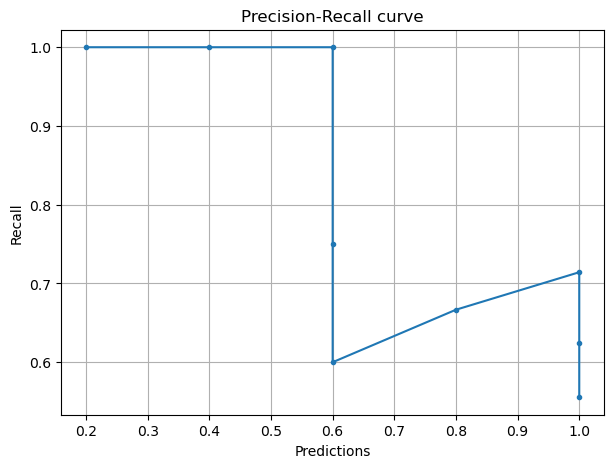

In [103]:
plt.figure(figsize=(7, 5))
plt.plot(recalls, preds, marker='.')
#plt.xlim(0, 1)  # Set x-axis limit
#plt.ylim(0, 1)  # Set y-axis limit
plt.xlabel('Predictions')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.grid()
plt.show()

### ScikitLearn

In [49]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, fbeta_score

# Example data


# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


# dsp. las voy a pasar a una fn. y con distintos thresholds voy a probar los resultaydos!!!
# y crear las gráficas precision-recall.....

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
f1 = f1_score(y_true, y_pred)
f0_5 = fbeta_score(y_true, y_pred, beta=0.5)
f2 = fbeta_score(y_true, y_pred, beta=2)

# Output
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"F1-score: {f1}")
print(f"F0.5-score: {f0_5}")
print(f"F2-score: {f2}")

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.8
False Positive Rate (FPR): 0.5
F1-score: 0.7272727272727272
F0.5-score: 0.689655172413793
F2-score: 0.7692307692307692


In [ ]:
# confussion matrix
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tp, tn, fp, fn

en scikitlearne el formato es:

[[TN, FP],

 [FN, TP]]

In [ ]:


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [12]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])


#Target scores, can either be probability estimates of the positive class, 
#or non-thresholded measure of decisions 

# computes preciosn-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)


[0.07585818 0.31002552 0.47502081 0.549834   0.66818777 0.6791787
 0.7109495  0.81757448 0.90887704]


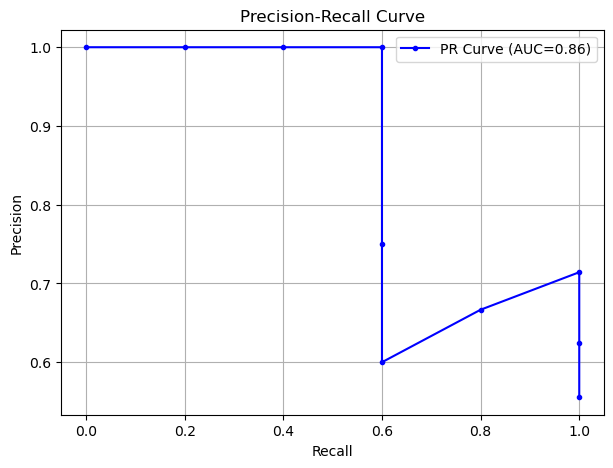

(array([1. , 1. , 1. , 0.8, 0.6, 0.6, 0.6, 0.4, 0.2, 0. ]),
 array([0.55555556, 0.625     , 0.71428571, 0.66666667, 0.6       ,
        0.75      , 1.        , 1.        , 1.        , 1.        ]))

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc



# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, probabilities)

print(thresholds)


# Compute AUC for reference
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


recall, precision

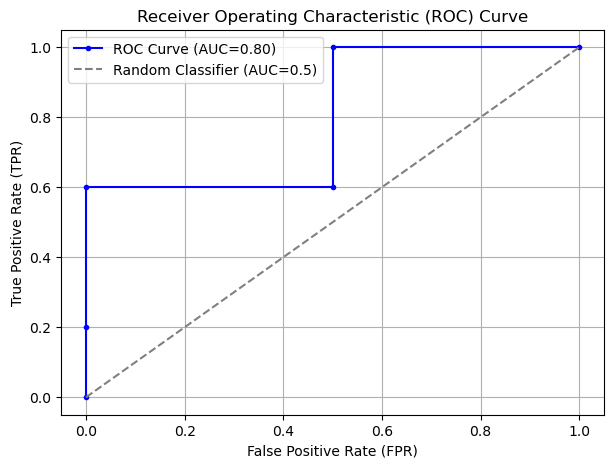

In [59]:

from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, probabilities)

# Compute AUC for reference
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC={roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

### Multi-class

In [105]:
# Define class labels
labels = [1, 2, 3, 4]


# Given confusion matrix
conf_matrix = np.array([
    [100, 20, 10, 5],  # Actual 1
    [15, 80, 5, 10],   # Actual 2
    [10, 5, 90, 5],    # Actual 3
    [5, 10, 5, 80]     # Actual 4
])


# Generate y_true and y_pred based on the confusion matrix
y_true = []
y_pred = []


for actual_class in range(4):  # Iterate over actual classes (0-indexed)
    for predicted_class in range(4):  # Iterate over predicted classes (0-indexed)
        count = conf_matrix[actual_class, predicted_class]
        y_true.extend([labels[actual_class]] * count)  # Append actual class
        y_pred.extend([labels[predicted_class]] * count)  # Append predicted class


# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)


# Verify the generated confusion matrix
computed_conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
print("Computed Confusion Matrix:")
print(computed_conf_matrix)



#y_true, y_pred

Computed Confusion Matrix:
[[100  20  10   5]
 [ 15  80   5  10]
 [ 10   5  90   5]
 [  5  10   5  80]]


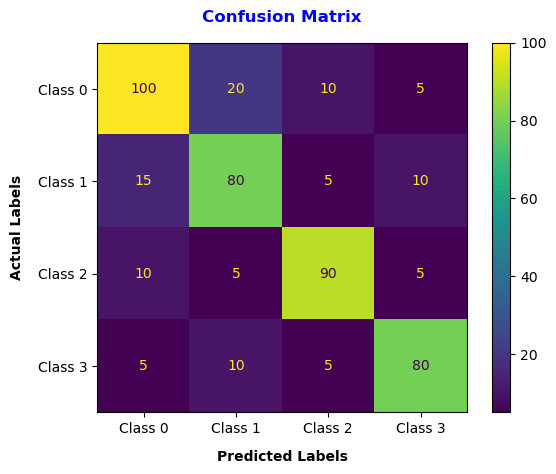

In [115]:
class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Coinfusin matrix')



# Make axis labels bold
plt.xlabel("Predicted Labels", fontsize=10, fontweight="bold", labelpad=10)
plt.ylabel("Actual Labels", fontsize=10, fontweight="bold", labelpad=10)
plt.title("Confusion Matrix",  fontweight="bold", color='blue', pad=15)


plt.show()

In [67]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_true, y_pred, average='macro')
f0_5 = fbeta_score(y_true, y_pred, beta=0.5, average='macro')
f2 = fbeta_score(y_true, y_pred, beta=2, average='macro')

# Calculate False Positive Rate (FPR) for each class
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives per class
tn = conf_matrix.sum() - (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - np.diag(conf_matrix))  # True Negatives per class
fpr = (fp / (fp + tn)).mean()  # Macro-average FPR

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro-Average): {precision:.4f}")
print(f"Recall (Macro-Average): {recall:.4f}")
print(f"False Positive Rate (FPR, Macro-Average): {fpr:.4f}")
print(f"F1-score (Macro-Average): {f1:.4f}")
print(f"F0.5-score (Macro-Average): {f0_5:.4f}")
print(f"F2-score (Macro-Average): {f2:.4f}")

Accuracy: 0.7692
Precision (Macro-Average): 0.7708
Recall (Macro-Average): 0.7715
False Positive Rate (FPR, Macro-Average): 0.0774
F1-score (Macro-Average): 0.7710
F0.5-score (Macro-Average): 0.7708
F2-score (Macro-Average): 0.7713


In [68]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='micro', zero_division=1)
recall = recall_score(y_true, y_pred, average='micro', zero_division=1)
f1 = f1_score(y_true, y_pred, average='micro')
f0_5 = fbeta_score(y_true, y_pred, beta=0.5, average='micro')
f2 = fbeta_score(y_true, y_pred, beta=2, average='micro')

# Calculate False Positive Rate (FPR) for each class
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives per class
tn = conf_matrix.sum() - (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - np.diag(conf_matrix))  # True Negatives per class
fpr = (fp / (fp + tn)).mean()  # Macro-average FPR

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro-Average): {precision:.4f}")
print(f"Recall (Macro-Average): {recall:.4f}")
print(f"False Positive Rate (FPR, Macro-Average): {fpr:.4f}")
print(f"F1-score (Macro-Average): {f1:.4f}")
print(f"F0.5-score (Macro-Average): {f0_5:.4f}")
print(f"F2-score (Macro-Average): {f2:.4f}")

Accuracy: 0.7692
Precision (Macro-Average): 0.7692
Recall (Macro-Average): 0.7692
False Positive Rate (FPR, Macro-Average): 0.0774
F1-score (Macro-Average): 0.7692
F0.5-score (Macro-Average): 0.7692
F2-score (Macro-Average): 0.7692


In [69]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted')
f0_5 = fbeta_score(y_true, y_pred, beta=0.5, average='weighted')
f2 = fbeta_score(y_true, y_pred, beta=2, average='weighted')

# Calculate False Positive Rate (FPR) for each class
fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives per class
tn = conf_matrix.sum() - (conf_matrix.sum(axis=1) + conf_matrix.sum(axis=0) - np.diag(conf_matrix))  # True Negatives per class
fpr = (fp / (fp + tn)).mean()  # Macro-average FPR

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro-Average): {precision:.4f}")
print(f"Recall (Macro-Average): {recall:.4f}")
print(f"False Positive Rate (FPR, Macro-Average): {fpr:.4f}")
print(f"F1-score (Macro-Average): {f1:.4f}")
print(f"F0.5-score (Macro-Average): {f0_5:.4f}")
print(f"F2-score (Macro-Average): {f2:.4f}")

Accuracy: 0.7692
Precision (Macro-Average): 0.7700
Recall (Macro-Average): 0.7692
False Positive Rate (FPR, Macro-Average): 0.0774
F1-score (Macro-Average): 0.7695
F0.5-score (Macro-Average): 0.7698
F2-score (Macro-Average): 0.7693
